# Project 3 (2 basic points when submitted in time. Minus 50% over total points after 12 hrs.)
- Keras를 사용하여 spam mail dataset을 분류할 수 있는 딥러닝 모델을 만듭니다.
- data: 5,171 spam mail messages
- 데이터의 불용어는 제거되어 있습니다.
- target: spam (1) or ham (0)

https://www2.aueb.gr/users/ion/data/enron-spam/

# Requirements
- Sample message의 단어 개수를 세어 보고 분포를 출력해 봅시다. (22_RNN_with_keras 참고) (2)
- keras에서 제공하는 TextVectorization layer를 사용하여, 적절한 토큰 개수 및 sequence padding을 통해 문자열을 토큰화합니다. (아래 구현된 layer 참고) (2)
    * https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization
- 토큰화된 문자열을 딥러닝에 알맞은 구조로 one-hot encoding합니다. (2)
- 아래의 구조대로 sequential model을 만들고 fit 이후 history를 plotting합니다. (2)

    ![](https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/proj03-architecture-rnn.png)

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import requests

URL = "https://raw.githubusercontent.com/crazytb/schadvmachinelearning/main/spam_ham_dataset_cleaned.csv"
response = requests.get(URL)
open("spam_ham_dataset_cleaned.csv", "wb").write(response.content)
df = pd.read_csv("spam_ham_dataset_cleaned.csv")

In [2]:
print(df.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num                                       text_cleaned  
0          0  Subject: enron methanol meter 988291 follow no...  
1          0  Subject: hpl nom january 9 2001 see attached f...  
2          0  Subject: neon retreat ho ho ho around wonderfu...  
3          1  Subject: photoshop windows office cheap main t...  
4          0  Subject: indian springs deal book teco pvr rev...  


In [3]:
df.shape

(5171, 5)

In [29]:
from sklearn.model_selection import train_test_split

x = df["text_cleaned"].to_numpy()
y = df["label_num"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Distibution of the sample data

Mean length: 719.948742746615
Median length: 363.0


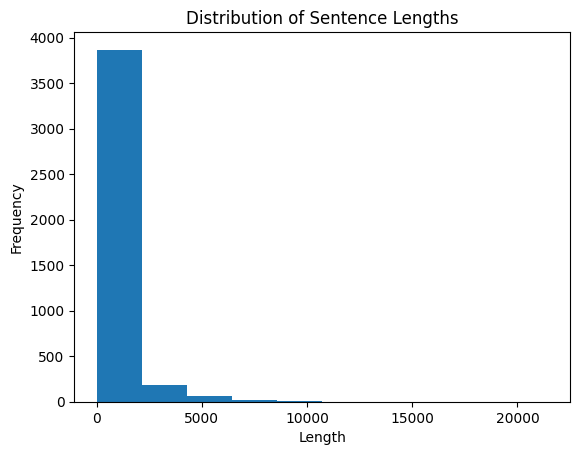

In [30]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)

# 문장 길이 계산
lengths = [len(sentence) for sentence in x_train]
mean_length = np.mean(lengths)
median_length = np.median(lengths)
#TextVectorization 파라미터 위한 평균, 중앙값 계산
print("Mean length:", mean_length)
#TextVectorization 에서 Feature에 사용
print("Median length:", median_length)
#TextVectorization 에서 Sequence에 사용

# 히스토그램 시각화
plt.hist(lengths)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()

### Tokenization
- 앞의 distribution에서 mean은 714, median은 366이었습니다.
- 이를 통해, max feature는 mean * 2 인 1400 정도로, max sequence length는 median인 360정도로 잡고 진행하겠습니다.

In [23]:
max_features = 1400
max_seq_length = 360

# Refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization and make a TextVectorization layer.
vectorize_layer = layers.TextVectorization(max_tokens=max_features, output_sequence_length=max_seq_length)
vectorize_layer.adapt(x_train)

print("x_train[0]:", x_train[0])
print("x_train[0]:", vectorize_layer(x_train[0]))

x_train[0]: Subject: call notes please find attached call notes weekend 3 10 11 01 bob
x_train[0]: tf.Tensor(
[  3  93 899   8 275  49  93 899 638   9  19  34  26  91   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  

### One-hot encoding (Use the vectorize layer that has been made above)

### Make sequential model and evaluate it

In [ ]:
# Make a sequential model

model = keras.Sequential()
...

In [ ]:
# Use this optimizer for your model

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
...

### Plotting history

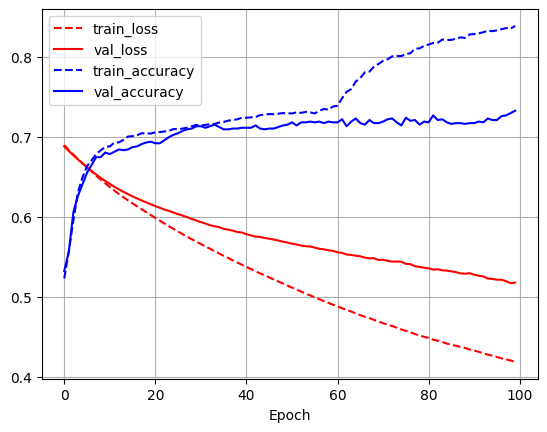